## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [0]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Find dimensions of an image in the dataset

In [0]:
x_train.shape

(60000, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train = x_train / 255.0
X_test = x_test / 255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
X_train = x_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = x_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [0]:
X_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import time

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

epochs = 10

callback = keras.callbacks.EarlyStopping(patience=5)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
Total params: 3,222,360
Trainable params: 3,222,360
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model
start = time.clock() 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32,callbacks=[callback])
#model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=32)
end = time.clock()
print("Train Time: {} ".format(end-start)) 

W0728 08:59:53.029641 140412259125120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 08:59:53.095305 140412259125120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 327us/step - loss: 2.0049 - acc: 0.2283 - val_loss: 1.9360 - val_acc: 0.2377
Epoch 2/10
60000/60000 [==============================] - 13s 211us/step - loss: 2.0608 - acc: 0.2014 - val_loss: 2.3357 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 13s 214us/step - loss: 2.3102 - acc: 0.0980 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 13s 209us/step - loss: 2.3028 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 13s 209us/step - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 13s 209us/step - loss: 2.3028 - acc: 0.0999 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 13s 209us/step - loss: 2.3028 - acc: 0.0987 - val_loss: 2.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# Create the model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

callback = keras.callbacks.EarlyStopping(patience=5)

epochs = 10


# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

W0728 09:03:03.306684 140412259125120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0728 09:03:03.347189 140412259125120 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
__________

In [0]:
# Fit the model
start = time.clock() 
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, callbacks=[callback])
#model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=32)
end = time.clock()
print("Train Time: {} ".format(end-start)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 175us/step - loss: 2.3154 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 10s 169us/step - loss: 2.3028 - acc: 0.0969 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 10s 167us/step - loss: 2.3028 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 10s 165us/step - loss: 2.3027 - acc: 0.0995 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 10s 167us/step - loss: 2.3028 - acc: 0.0966 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 10s 165us/step - loss: 2.3028 - acc: 0.0978 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 10s 164us/step - loss: 2.3028 - acc: 0.0970 - val_loss: 2.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(X_train)
    

In [0]:
X_train.shape

(60000, 28, 28, 1)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

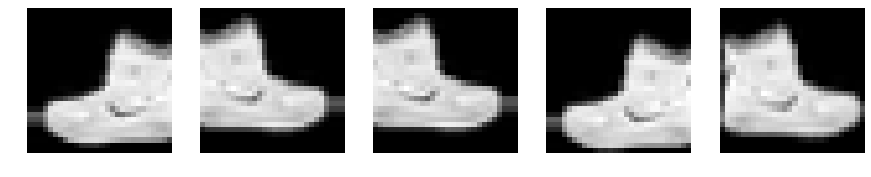

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(10, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
Total params: 3,222,360
Trainable params: 3,222,360
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size=32),
                        samples_per_epoch = X_train.shape[0],
                        nb_epoch=10,
                        validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=1875, epochs=10)`
  """


Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.3226 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2.3035 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2.3028 - acc: 0.0976 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2.3028 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2.3038 - acc: 0.0999 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2.3030 - acc: 0.0963 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 2.3032 - acc: 0.0976 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 8/10
1875/1875 [==========================

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten

### **Load CIFAR10 dataset**

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Conv2D(32, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

In [0]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)



### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

In [0]:
datagen.fit(X_train)

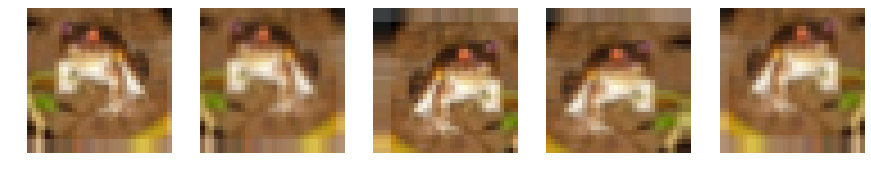

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()